In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:
#Project folder path as a string
path = r'/Users/Nimrat/Documents/ClimateWins'

In [3]:
#Importing the ClimateWins dataset into notebook
climate_df = pd.read_csv(os.path.join(path, 'Original data', 'ClimateWins data.csv'))

In [4]:
#Importing pleasant weather dataset into notebook
pleasant_weather = pd.read_csv(os.path.join(path, 'Original data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
#Dropping unrelated station data of GDANSK, ROMA and TOURS from main data
df=climate_df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [6]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [7]:
#Creating an 'X' and 'y' matrix by dropind Date and Month column
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)

In [8]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [10]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


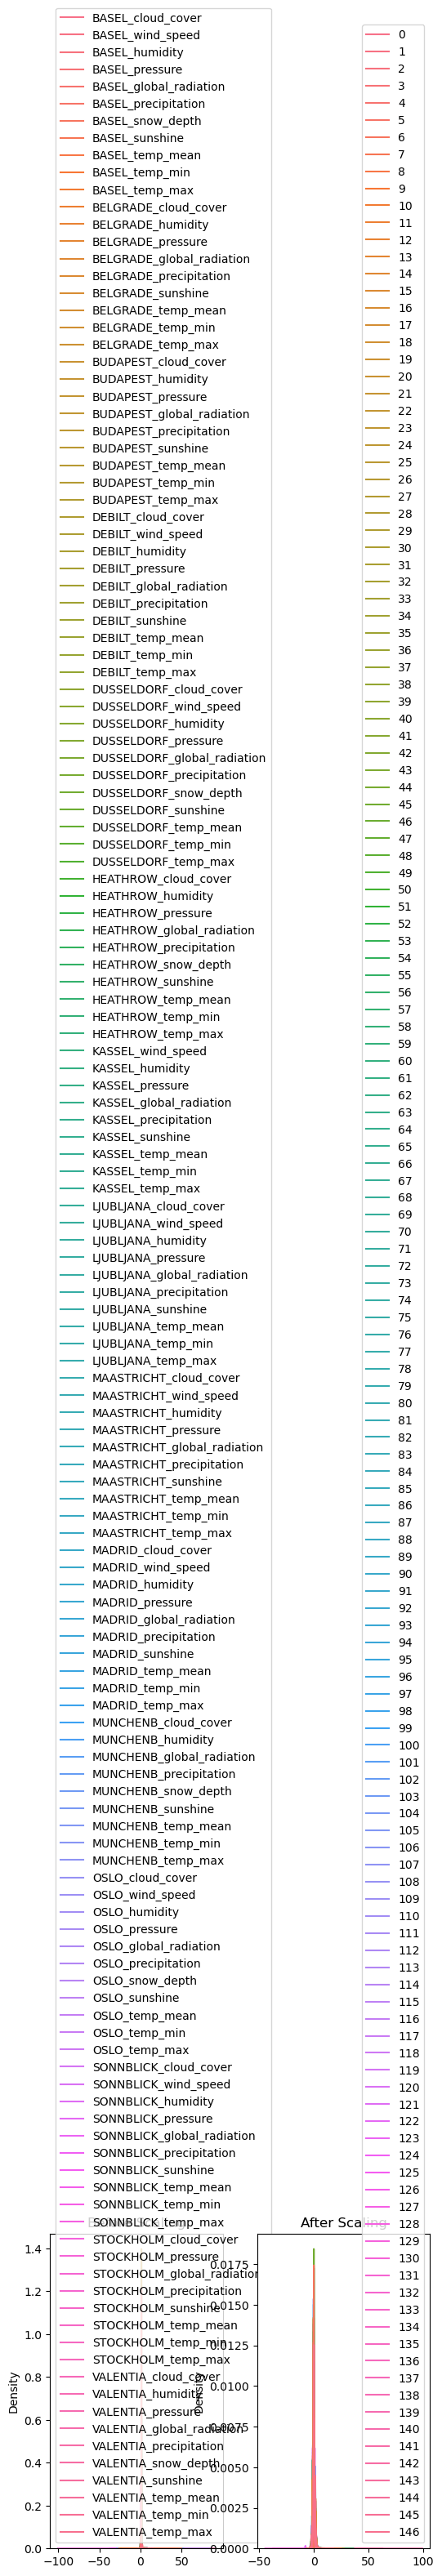

In [14]:
#Show scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

In [15]:
#ANN on unscaled data
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

ann_unscaled = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, tol=1e-4, random_state=42)
ann_unscaled.fit(X_train, y_train)

y_pred_train_unscaled = ann_unscaled.predict(X_train)
y_pred_test_unscaled  = ann_unscaled.predict(X_test)

train_acc_unscaled = accuracy_score(y_train, y_pred_train_unscaled)
test_acc_unscaled  = accuracy_score(y_test, y_pred_test_unscaled)

print("ANN UNSCALED -> Train accuracy:", train_acc_unscaled)
print("ANN UNSCALED -> Test accuracy :", test_acc_unscaled)

ANN UNSCALED -> Train accuracy: 0.6412386706948641
ANN UNSCALED -> Test accuracy : 0.6021261763680725


In [16]:
#ANN on scaled data
ann_scaled = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, tol=1e-4, random_state=42)
ann_scaled.fit(X_train_sc, y_train)

y_pred_train_scaled = ann_scaled.predict(X_train_sc)
y_pred_test_scaled  = ann_scaled.predict(X_test_sc)

train_acc_scaled = accuracy_score(y_train, y_pred_train_scaled)
test_acc_scaled  = accuracy_score(y_test, y_pred_test_scaled)

print("ANN SCALED -> Train accuracy:", train_acc_scaled)
print("ANN SCALED -> Test accuracy :", test_acc_scaled)

ANN SCALED -> Train accuracy: 0.75185916802231
ANN SCALED -> Test accuracy : 0.6483095155106309


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
#ANN setups and find best test accuracy
configs = [
    {"name": "Scenario 1", "layers": (25,),        "max_iter": 500,  "tol": 1e-4},
    {"name": "Scenario 2", "layers": (50, 25),     "max_iter": 800,  "tol": 1e-5},
    {"name": "Scenario 3", "layers": (100, 50,25), "max_iter": 1200, "tol": 1e-5},
]

results = []

for cfg in configs:
    model = MLPClassifier(hidden_layer_sizes=cfg["layers"],
                          max_iter=cfg["max_iter"],
                          tol=cfg["tol"],
                          random_state=42)
    model.fit(X_train_sc, y_train)

    pred_tr = model.predict(X_train_sc)
    pred_te = model.predict(X_test_sc)

    tr_acc = accuracy_score(y_train, pred_tr)
    te_acc = accuracy_score(y_test, pred_te)

    results.append((cfg["name"], cfg["layers"], cfg["max_iter"], cfg["tol"], tr_acc, te_acc, pred_te))

    print(f"\n{cfg['name']}")
    print("layers:", cfg["layers"], "max_iter:", cfg["max_iter"], "tol:", cfg["tol"])
    print("Train acc:", tr_acc)
    print("Test acc :", te_acc)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Scenario 1
layers: (25,) max_iter: 500 tol: 0.0001
Train acc: 0.7041598884499186
Test acc : 0.6427326594632276

Scenario 2
layers: (50, 25) max_iter: 800 tol: 1e-05
Train acc: 0.7201952126423425
Test acc : 0.6192052980132451

Scenario 3
layers: (100, 50, 25) max_iter: 1200 tol: 1e-05
Train acc: 0.8609690913316291
Test acc : 0.5986406413384454


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


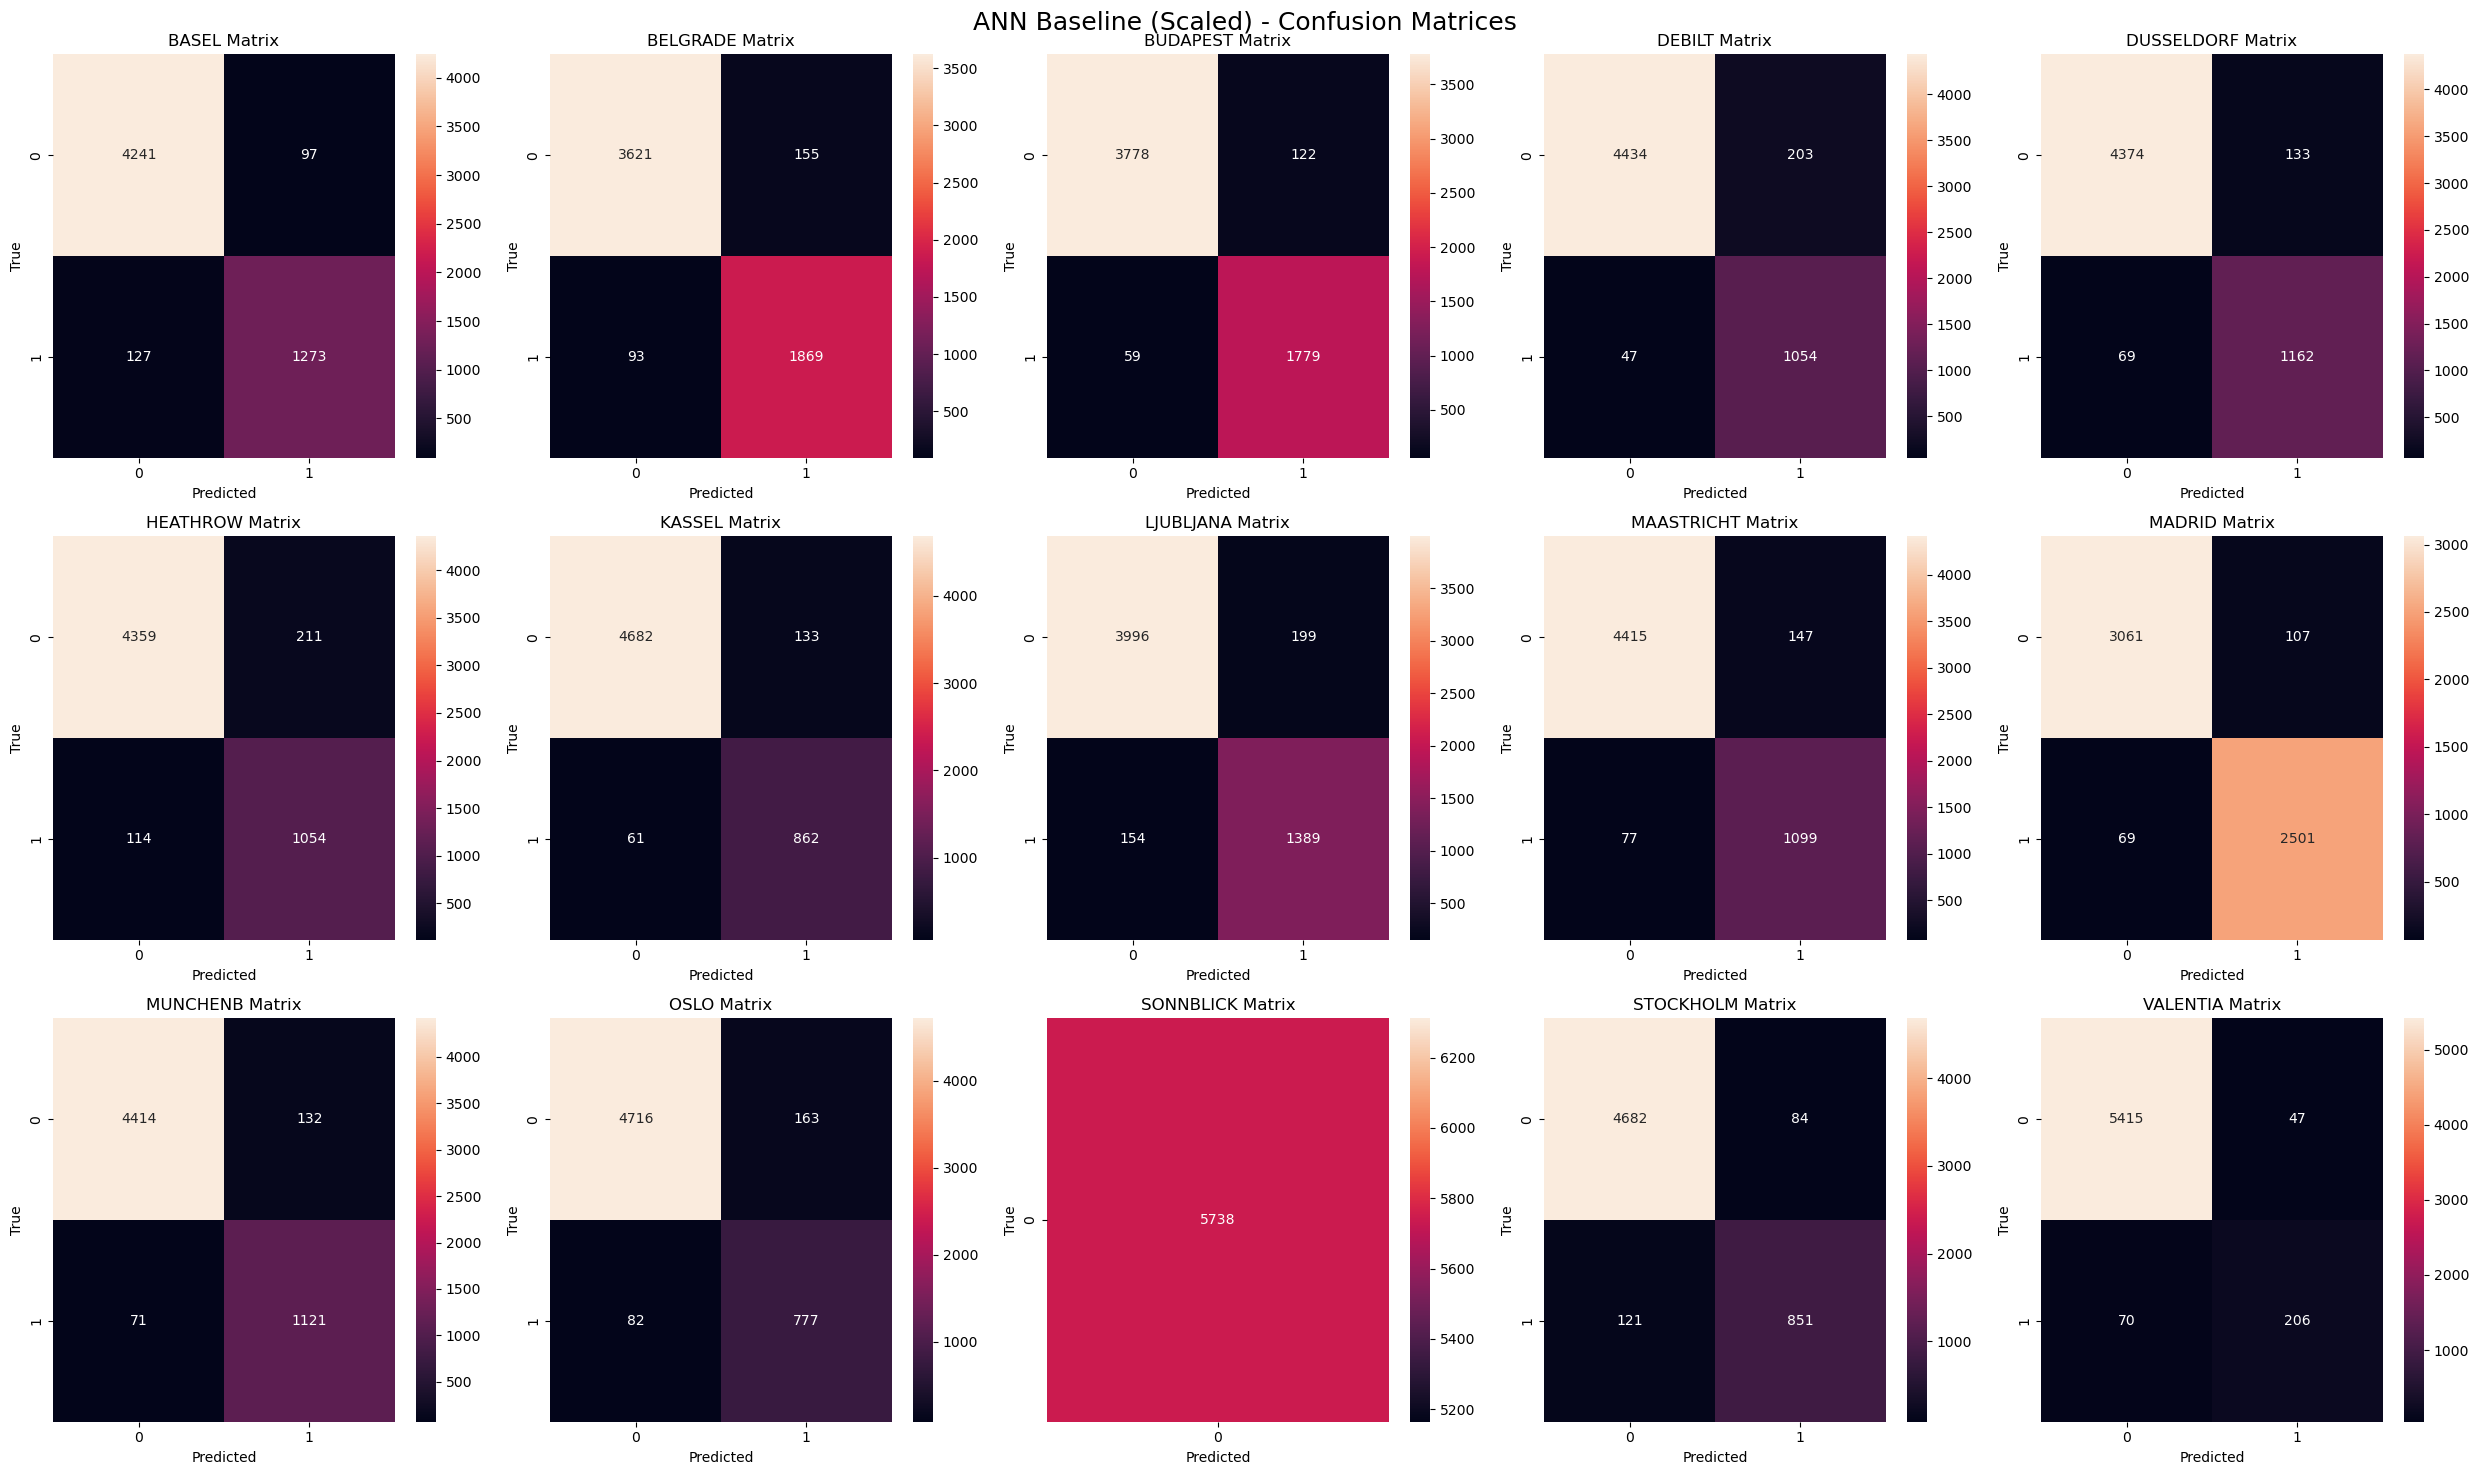

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


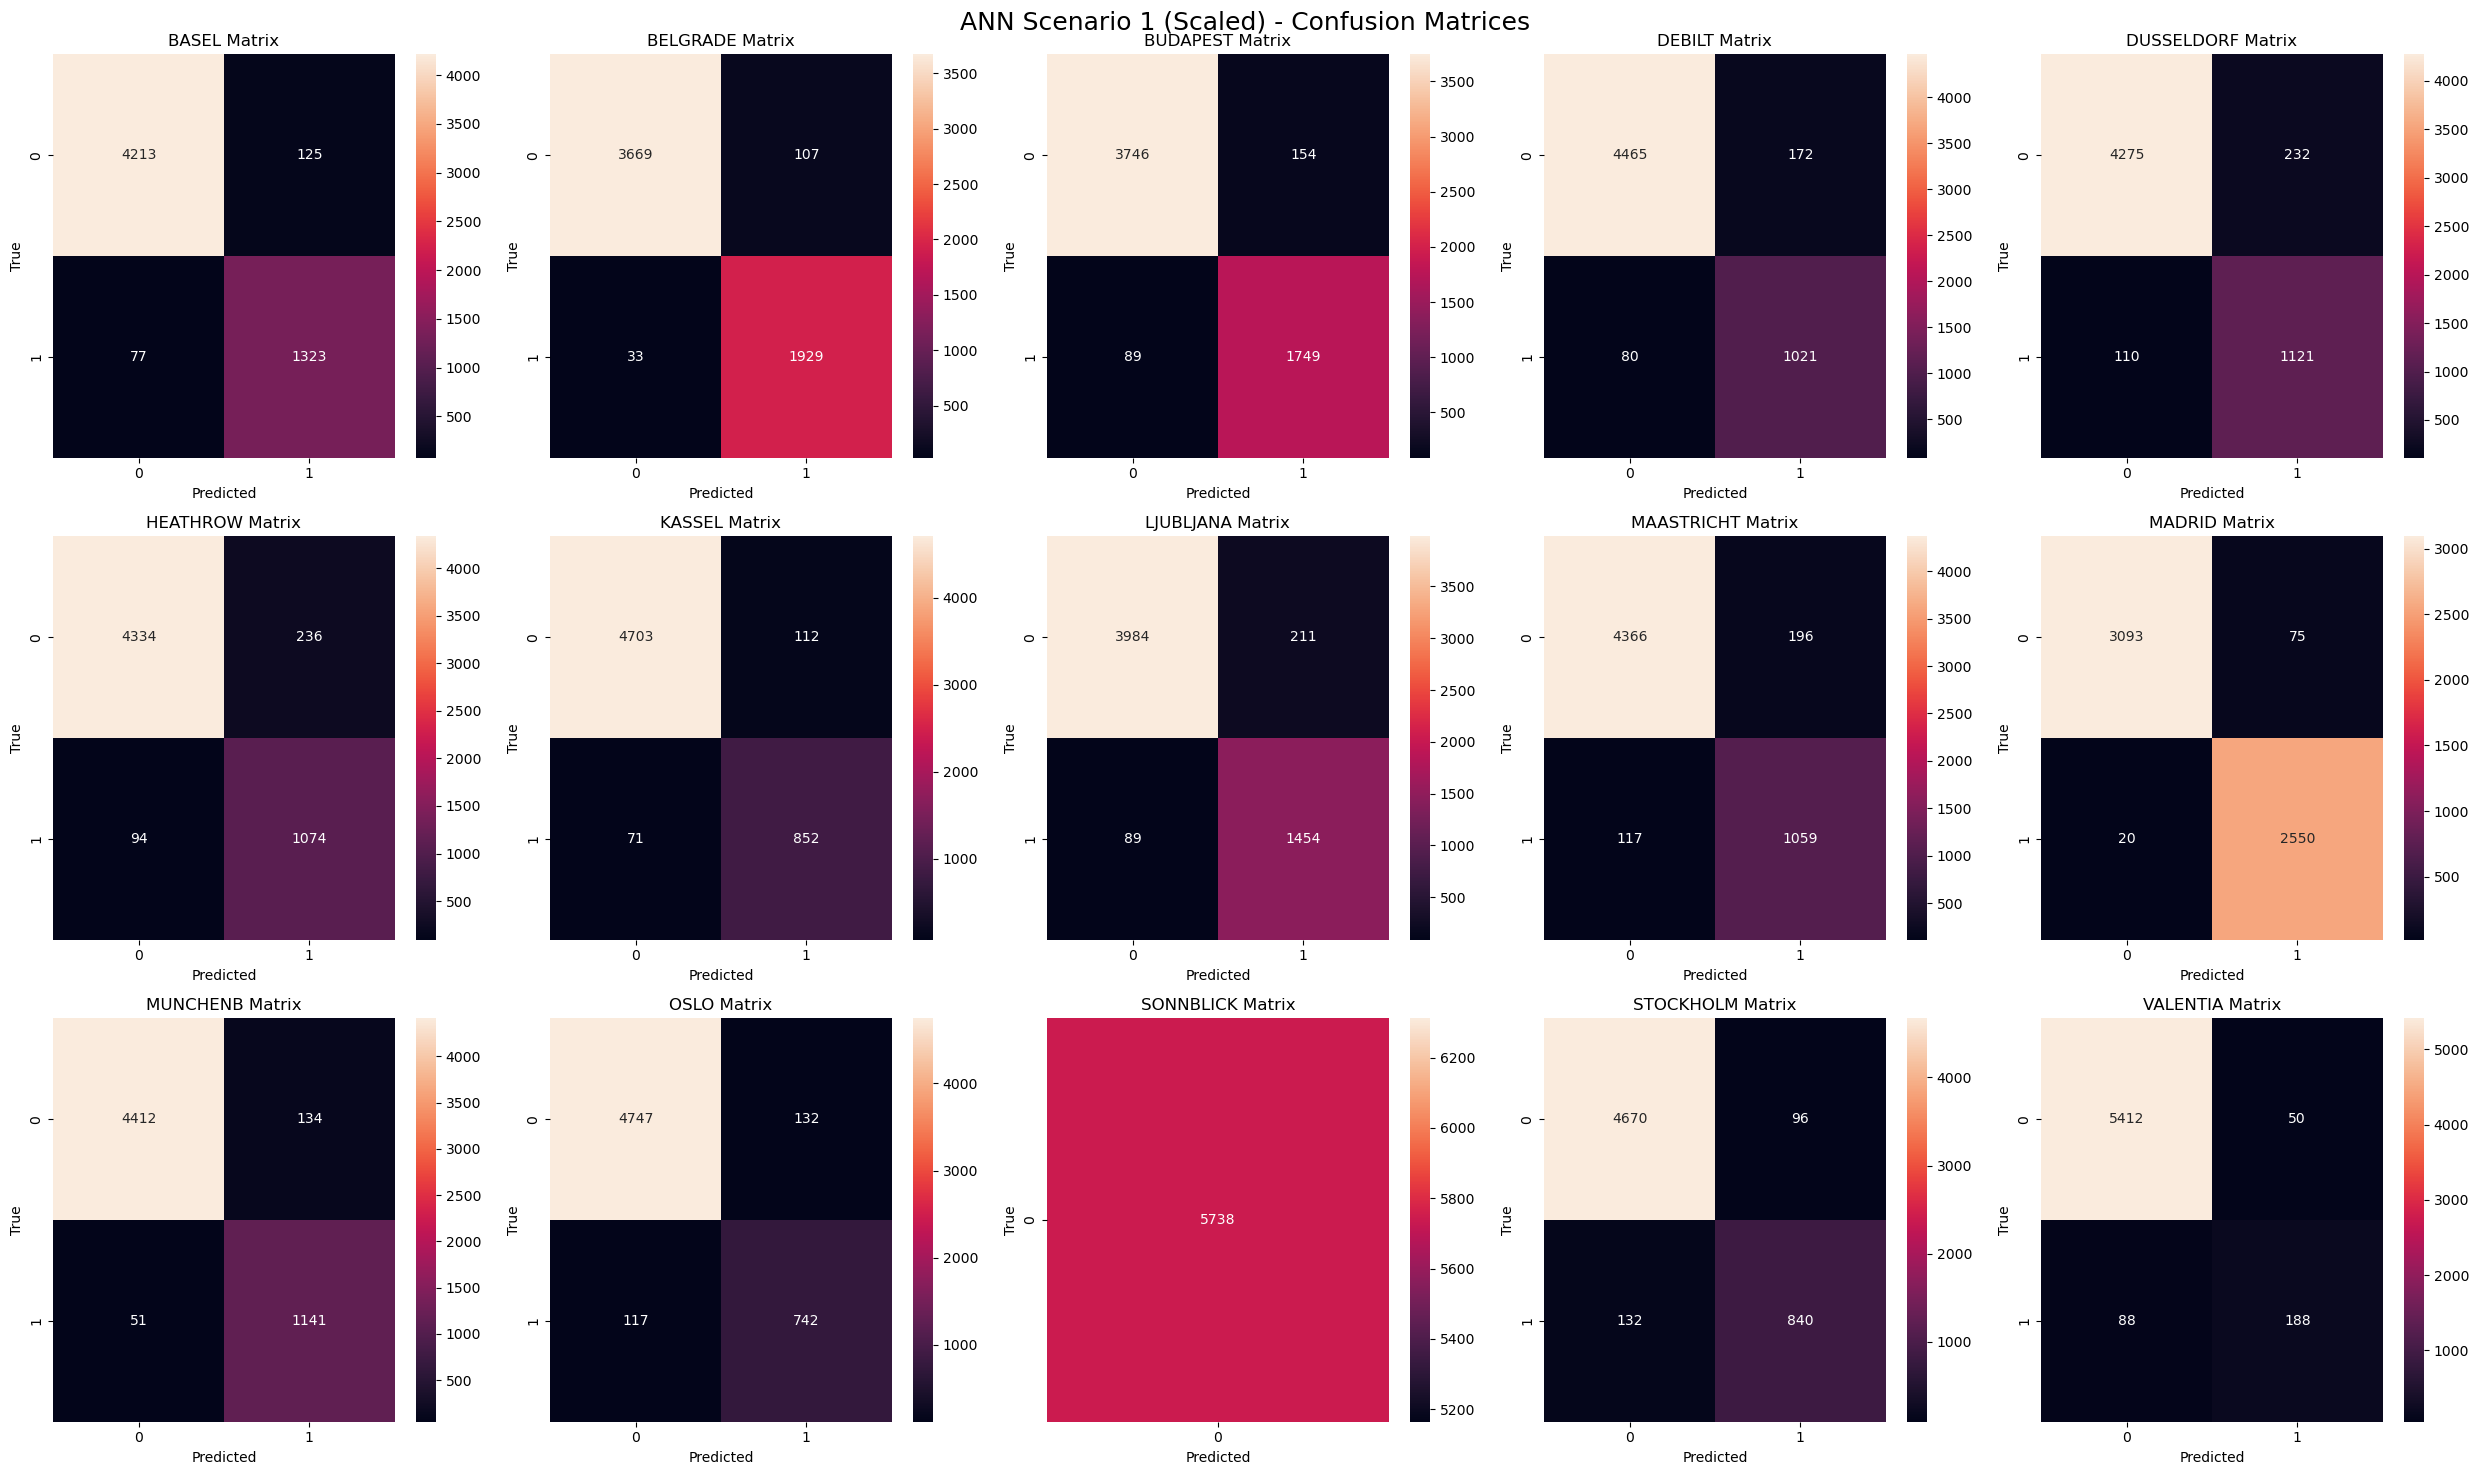

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


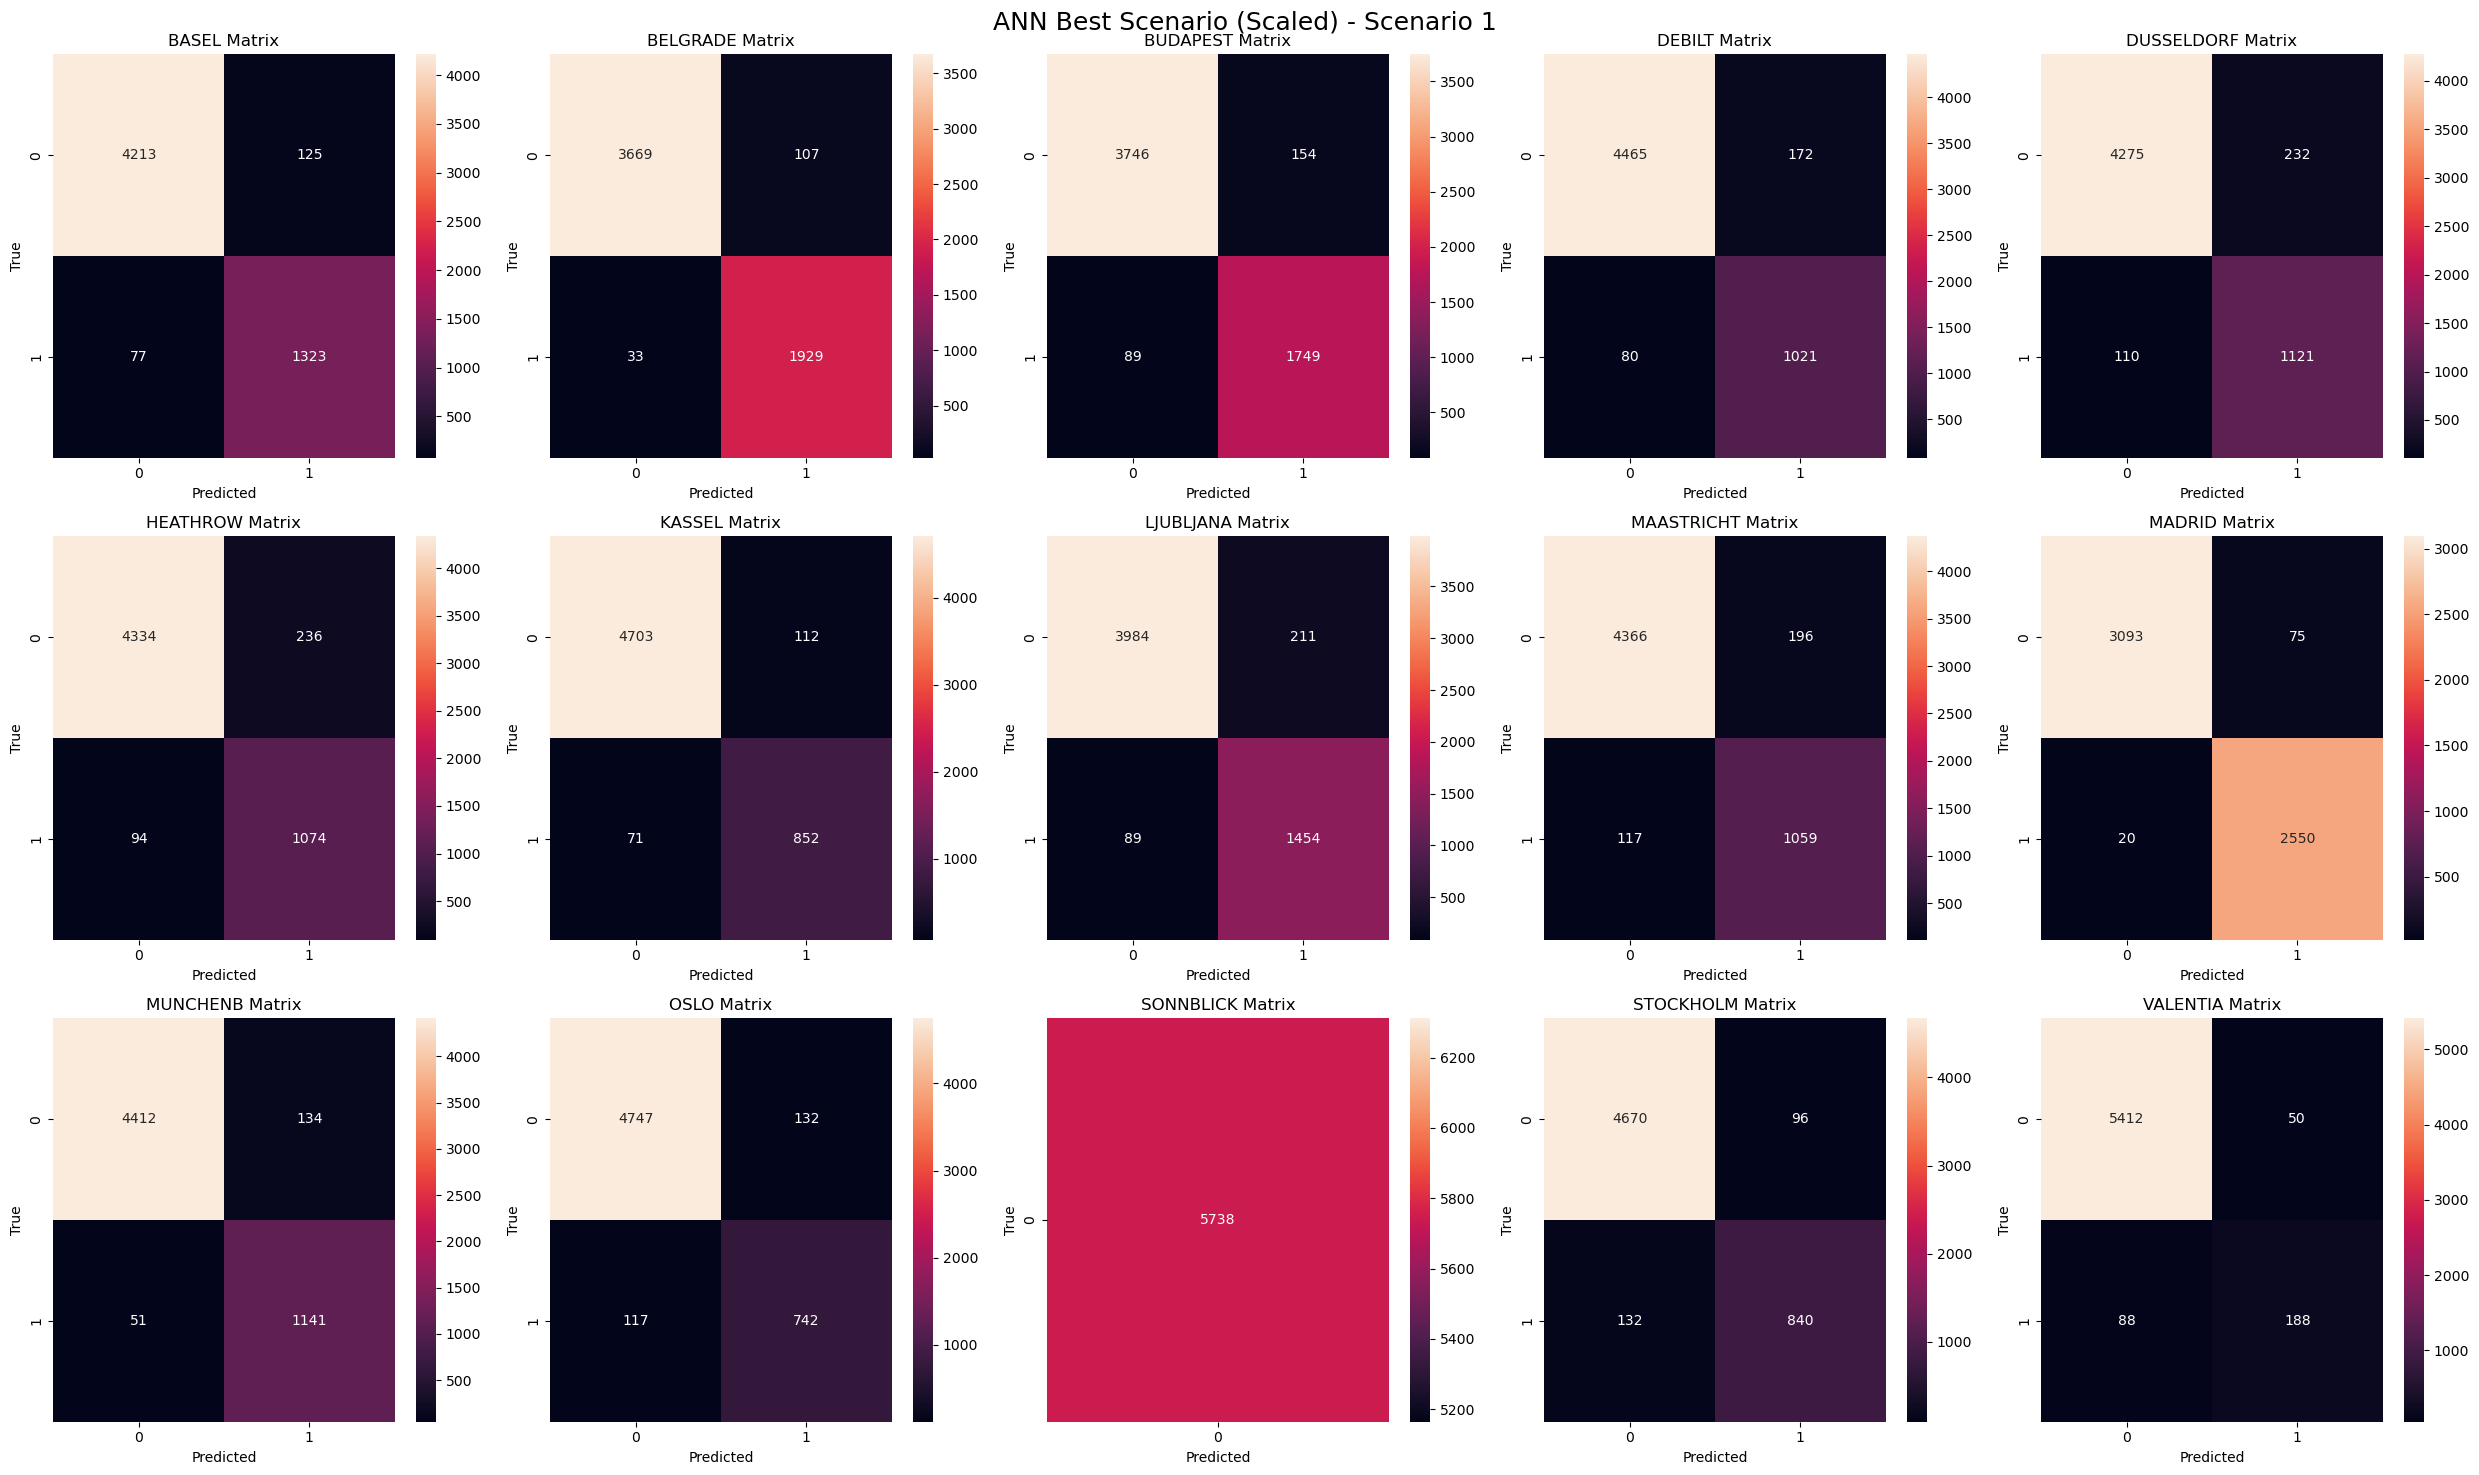

In [18]:
#Confusion matrix for 3 scenarios
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_station_confusions(y_true_df, y_pred_np, title):
    key = "_pleasant_weather"
    stations = sorted([c.replace(key, "") for c in y_true_df.columns if c.endswith(key)])
    y_true_np = y_true_df.to_numpy()

    fig, ax = plt.subplots(3, 5, figsize=(25, 15))
    fig.suptitle(title, fontsize=18)
    count = 0

    for i in range(3):
        for j in range(5):
            station = stations[count]
            cm = confusion_matrix(y_true_np[:, count], y_pred_np[:, count])

            sns.heatmap(cm, annot=True, fmt="g", ax=ax[i, j])
            ax[i, j].set_title(f"{station} Matrix")
            ax[i, j].set_xlabel("Predicted")
            ax[i, j].set_ylabel("True")
            count += 1

    plt.tight_layout()
    plt.show()

# 1) Baseline scaled
plot_station_confusions(y_test, y_pred_test_scaled, "ANN Baseline (Scaled) - Confusion Matrices")

# 2) Scenario 1 scaled (from results list)
scenario1_pred = results[0][6]
plot_station_confusions(y_test, scenario1_pred, "ANN Scenario 1 (Scaled) - Confusion Matrices")

# 3) Best scenario scaled (highest test acc)
best = max(results, key=lambda x: x[5])
best_pred = best[6]
plot_station_confusions(y_test, best_pred, f"ANN Best Scenario (Scaled) - {best[0]}")
